In [2]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# import joblib

# # Load processed dataset
# df = pd.read_csv("../data/processed/bank_transactions_features.csv")

# # Fill missing values (if any)
# df.fillna(0, inplace=True)

# # Define features for ML
# feature_cols = ['Account_Balance', 'txn_hour', 'txn_weekday', 'customer_avg_balance', 'balance_dev',
#                 'new_device', 'new_location', 'high_risk_merchant']

# # Add one-hot encoded categorical columns
# feature_cols += [col for col in df.columns if 'Transaction_Device_' in col or 
#                  'Device_Type_' in col or 'Account_Type_' in col]

# X = df[feature_cols]
# y = df['Is_Fraud']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=42
# )

# # Train Random Forest
# rf_model = RandomForestClassifier(
#     n_estimators=200,           # Increased estimators for better accuracy
#     class_weight='balanced',    # Handle imbalanced data
#     random_state=42
# )
# rf_model.fit(X_train, y_train)

# # Predictions
# y_pred = rf_model.predict(X_test)

# # Evaluation
# print("=== Classification Report ===")
# print(classification_report(y_test, y_pred))

# print("=== Confusion Matrix ===")
# print(confusion_matrix(y_test, y_pred))

# # Feature importance (optional for portfolio)
# import matplotlib.pyplot as plt
# import seaborn as sns

# feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
# feat_importances = feat_importances.sort_values(ascending=False)

# plt.figure(figsize=(10,6))
# sns.barplot(x=feat_importances[:15], y=feat_importances[:15].index)
# plt.title("Top 15 Feature Importances")
# plt.show()

# # Save model for dashboard
# joblib.dump(rf_model, "../model/rf_model.pkl")
# print("Random Forest model saved to ../model/rf_model.pkl")


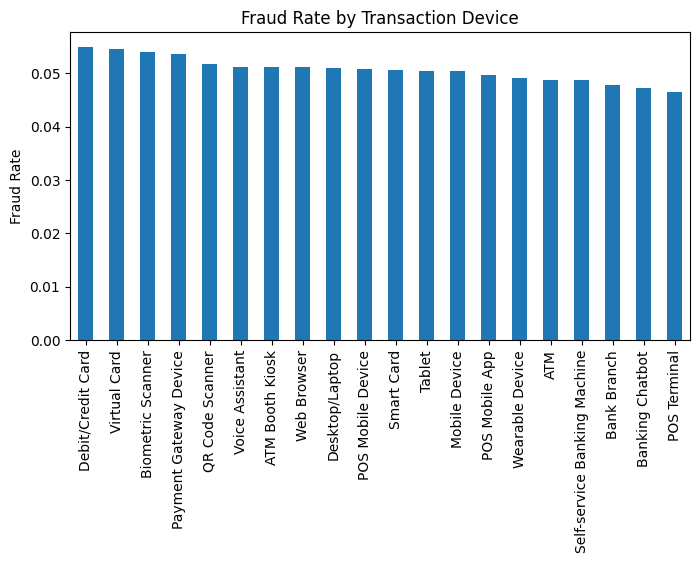

In [3]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load processed CSV + model ---
df = pd.read_csv("../data/processed/bank_transactions_features.csv")
clf = joblib.load("../model/logistic_model.pkl")

# --- Identify one-hot encoded device columns ---
device_cols = [c for c in df.columns if "Transaction_Device_" in c]

# --- Compute fraud rate per device ---
fraud_by_device = {}
for col in device_cols:
    # Filter rows where this device is used
    idx = df[col] == 1
    fraud_rate = df.loc[idx, "Is_Fraud"].mean()
    device_name = col.replace("Transaction_Device_", "")
    fraud_by_device[device_name] = fraud_rate

# --- Plot ---
fraud_by_device = pd.Series(fraud_by_device).sort_values(ascending=False)
fraud_by_device.plot(kind='bar', figsize=(8,4))
plt.title("Fraud Rate by Transaction Device")
plt.ylabel("Fraud Rate")
plt.show()
